In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [3]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

#Hd is heart disease column tells us whether they have no heart disease = 0 or different types of heart diseases from 1 to 4 
#We'll build decision tree with multiclass variable and group all of the heart disease outputs to =1 so that we can make this a binary problem
#rest of the data is combination of categorical and continuous variables

In [4]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
df.info()
#Ca and thal columns are object variables even though they looked like integers which indicates to us that we'll need to clean them up and figure out why its like this 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df[~df['ca'].str.isnumeric()]
#This is a quick way to do that to remove any values that cant convert to numerical values
#This will cause missing values so we can just fill it in with missing values later
# these steps are done below

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### Data cleaning

In [8]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
df[df['ca']=='?'].index.values

array([166, 192, 287, 302])

In [11]:
df[df['thal']=='?'].index.values

array([ 87, 266])

In [12]:
# drop observations
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values)

In [13]:
df = df.drop(to_drop)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [15]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


# data exploration

<Axes: xlabel='hd', ylabel='thalach'>

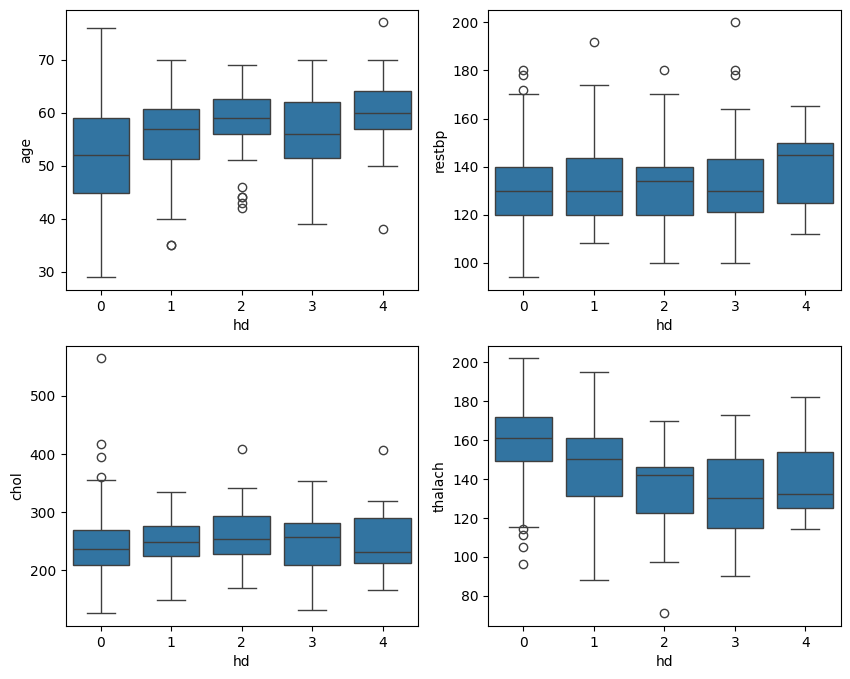

In [17]:
# continuous variables - age, restbp, chol, thalach

#First we are going to look at the continuous variables by making plots here to compare heart disease to those continuous variables

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd', y='age', data=df, ax=ax1)
sns.boxplot(x='hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='hd', y='thalach', data=df, ax=ax4)


# It does seem lke there is a bit of a relationship between the age and hd as well as thalach and hd

In [18]:
# check output variable just to see something
#we have 160 observations observations out of 303 that dont have heart disease

df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [19]:
# binary output
#Here we are mapping all heart disease values to 1 so we can create a binary heart disease variable
# Here we are mapping it so we have 1 turns into 1, 2 turns into 1, etc...
mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['binary_hd'] = df['hd'].map(mapping)

In [20]:
df.groupby('binary_hd').count()
#Now we are groupby counting our binary variable to have more of a balanced dataset 

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
binary_hd,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='binary_hd', ylabel='thalach'>

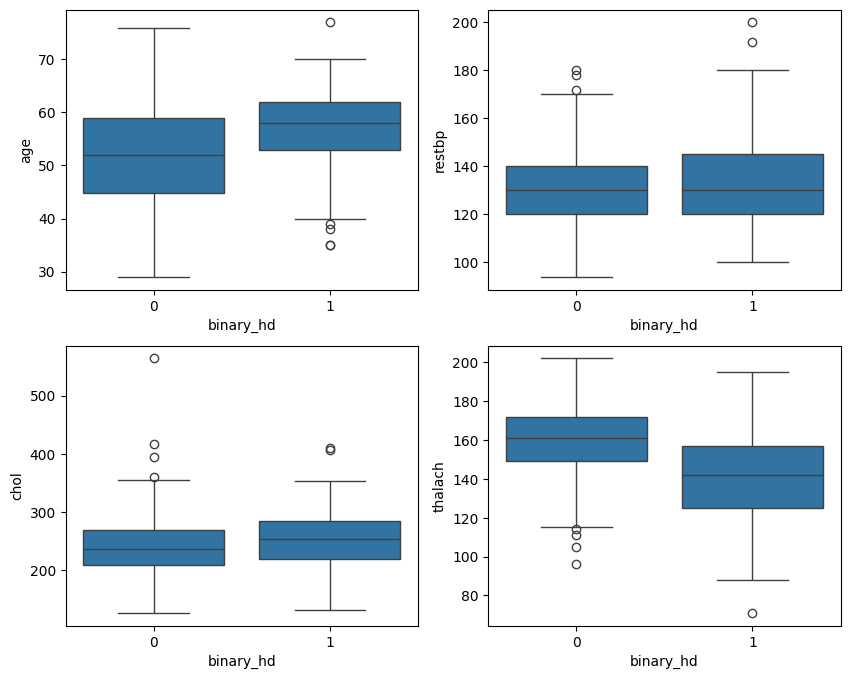

In [21]:
# continuous variables - age, restbp, chol, thalach

# Here we are looking at the analysis again but this time only for the binary variables
#this gives us a more clear distinction in behaviour between people who do and dont have HD

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='binary_hd', y='age', data=df, ax=ax1)
sns.boxplot(x='binary_hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='binary_hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='binary_hd', y='thalach', data=df, ax=ax4)

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'binary_hd'],
      dtype='object')

<Axes: xlabel='binary_hd'>

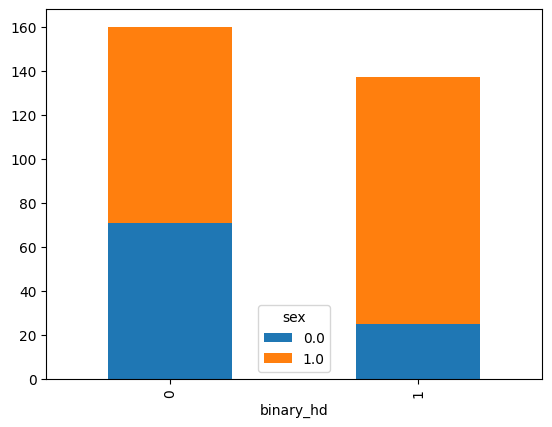

In [23]:
df.groupby(['binary_hd','sex'])['age'].count().unstack().plot(kind='bar', stacked=True)

#for categotical variable analysis she wont do all of them but she recommends grouping by output variable and each of the random variables to do counts for then unstack the plots and create a bar graph
# this helps her compare more easily
# First she starts with age here


<Axes: xlabel='binary_hd'>

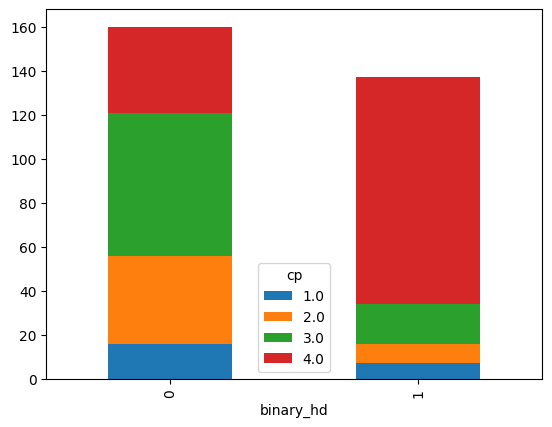

In [24]:
df.groupby(['binary_hd','cp'])['age'].count().unstack().plot(kind='bar', stacked=True)
# here she does it by CP and sees taht 4 is the most prominent category here

<Axes: xlabel='binary_hd'>

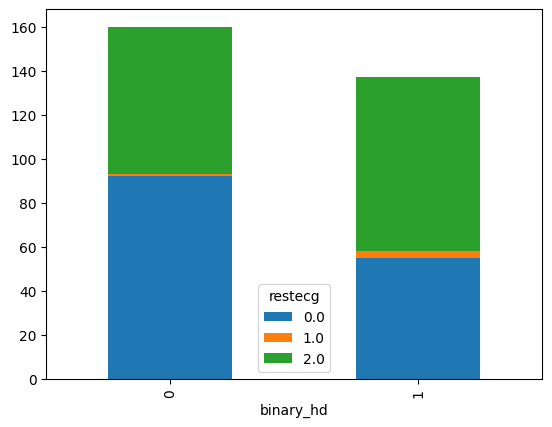

In [25]:
df.groupby(['binary_hd','restecg'])['age'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='binary_hd'>

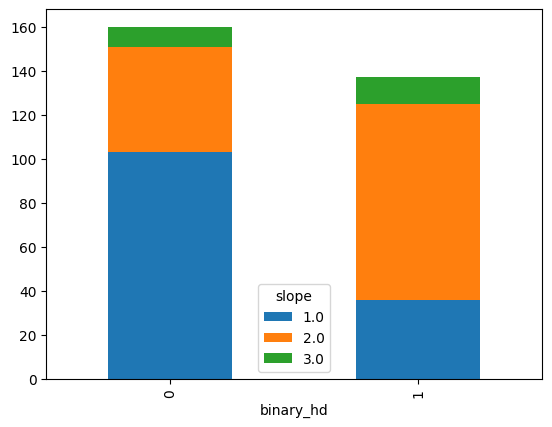

In [26]:
df.groupby(['binary_hd','slope'])['age'].count().unstack().plot(kind='bar', stacked=True)

#Slope seems to be relevant here for heart disease

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'binary_hd'],
      dtype='object')

In [28]:
#For the purpose of our demonstration model here we are just going to take all of the variables.

In [29]:
# First shes just going to define all the categorical columns
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal']

In [30]:
#Here she defined X as anything up to column 13 and for Y variable shes going to start with binary variable
X = df.iloc[:, :13]
y = df['binary_hd']

In [31]:
y_2 = df['hd']

In [32]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)
#this will encode all data for us so we have 118 columns of data
# Here she is converting all categorical columns into dummy variables idk why tho

In [33]:
X_encoded

,age,restbp,chol,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,2.3,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,1.5,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,2.6,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,3.5,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,1.4,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.2,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,1.2,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,3.4,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,1.2,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [35]:
#here we are building baseline decision tree model
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

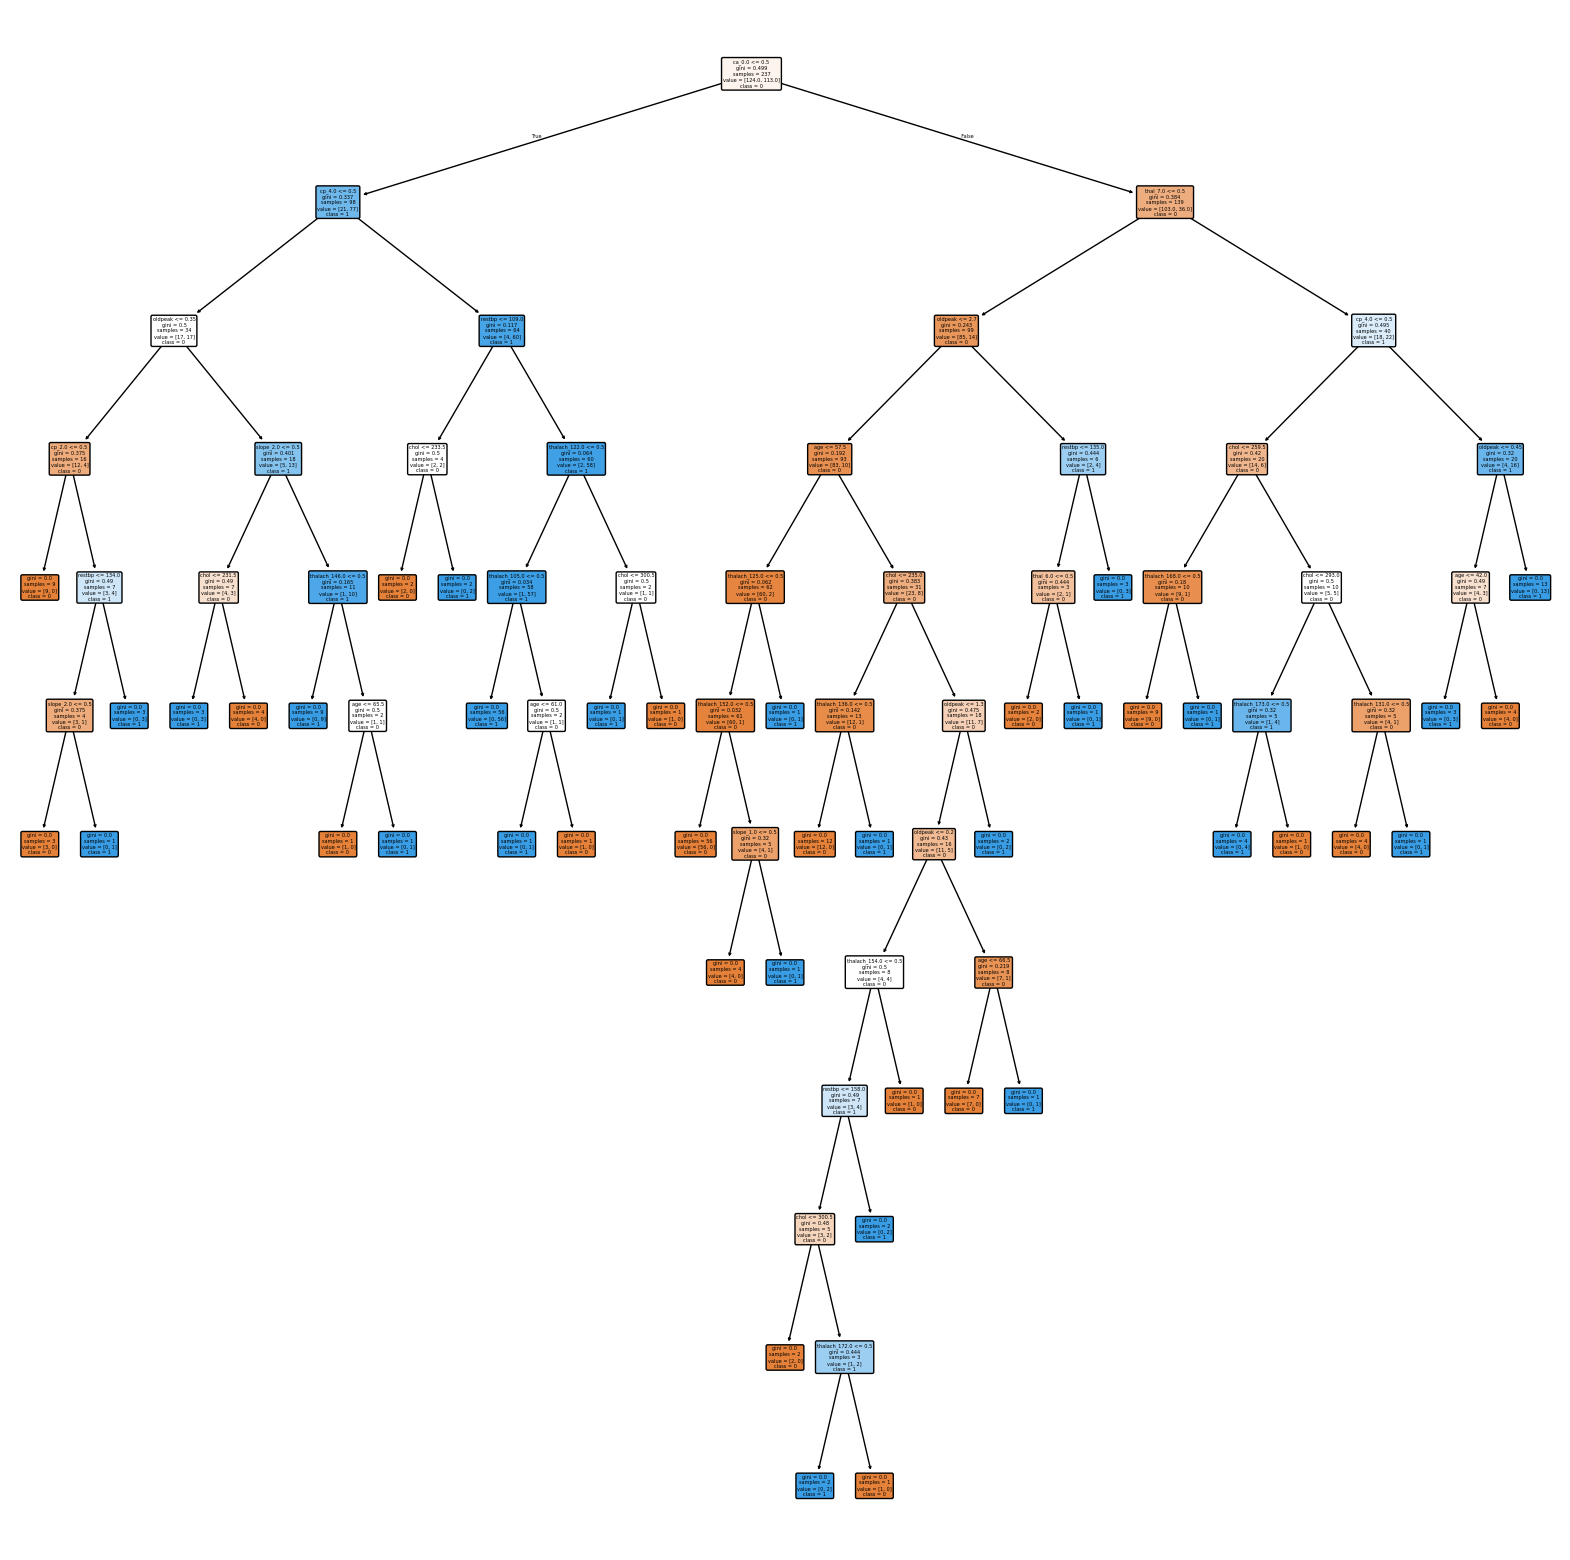

In [36]:
#This is plotting the tree
# note how we only have 2 classifiers here either 1 or 0
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [37]:
#we'll make some predictions here on the training and testing data
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)

#She is taking training observations and putting them in the model and then comparing that to the actual thing in your model

In [38]:
# without constraints we can see the tree is perfectly fitted to the training data

# We can see model is perfectly fitted to training data but for testing data its not that much this allows us to tell that this is overfitted since the discrepancy is large
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

#This is a quick test to check for overfitting

1.0
0.85


In [39]:
y2 = df['hd']

#Here she is making a y2 variable to use the regular heart disease since now we are doing the multiclass problem
# Then below we rebbuild the tree and model like we did before for the categorical one.

In [40]:
# We are going to split our data again but this time for the multiclass problem shown as y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y_2, test_size=0.2, random_state=42)

In [41]:
#Then we create teh same tree but for a multiclass problem
#note below that we have 5 different classes for this
dt2 = DecisionTreeClassifier(random_state=123)
dt2 = dt2.fit(X_train2, y_train2)

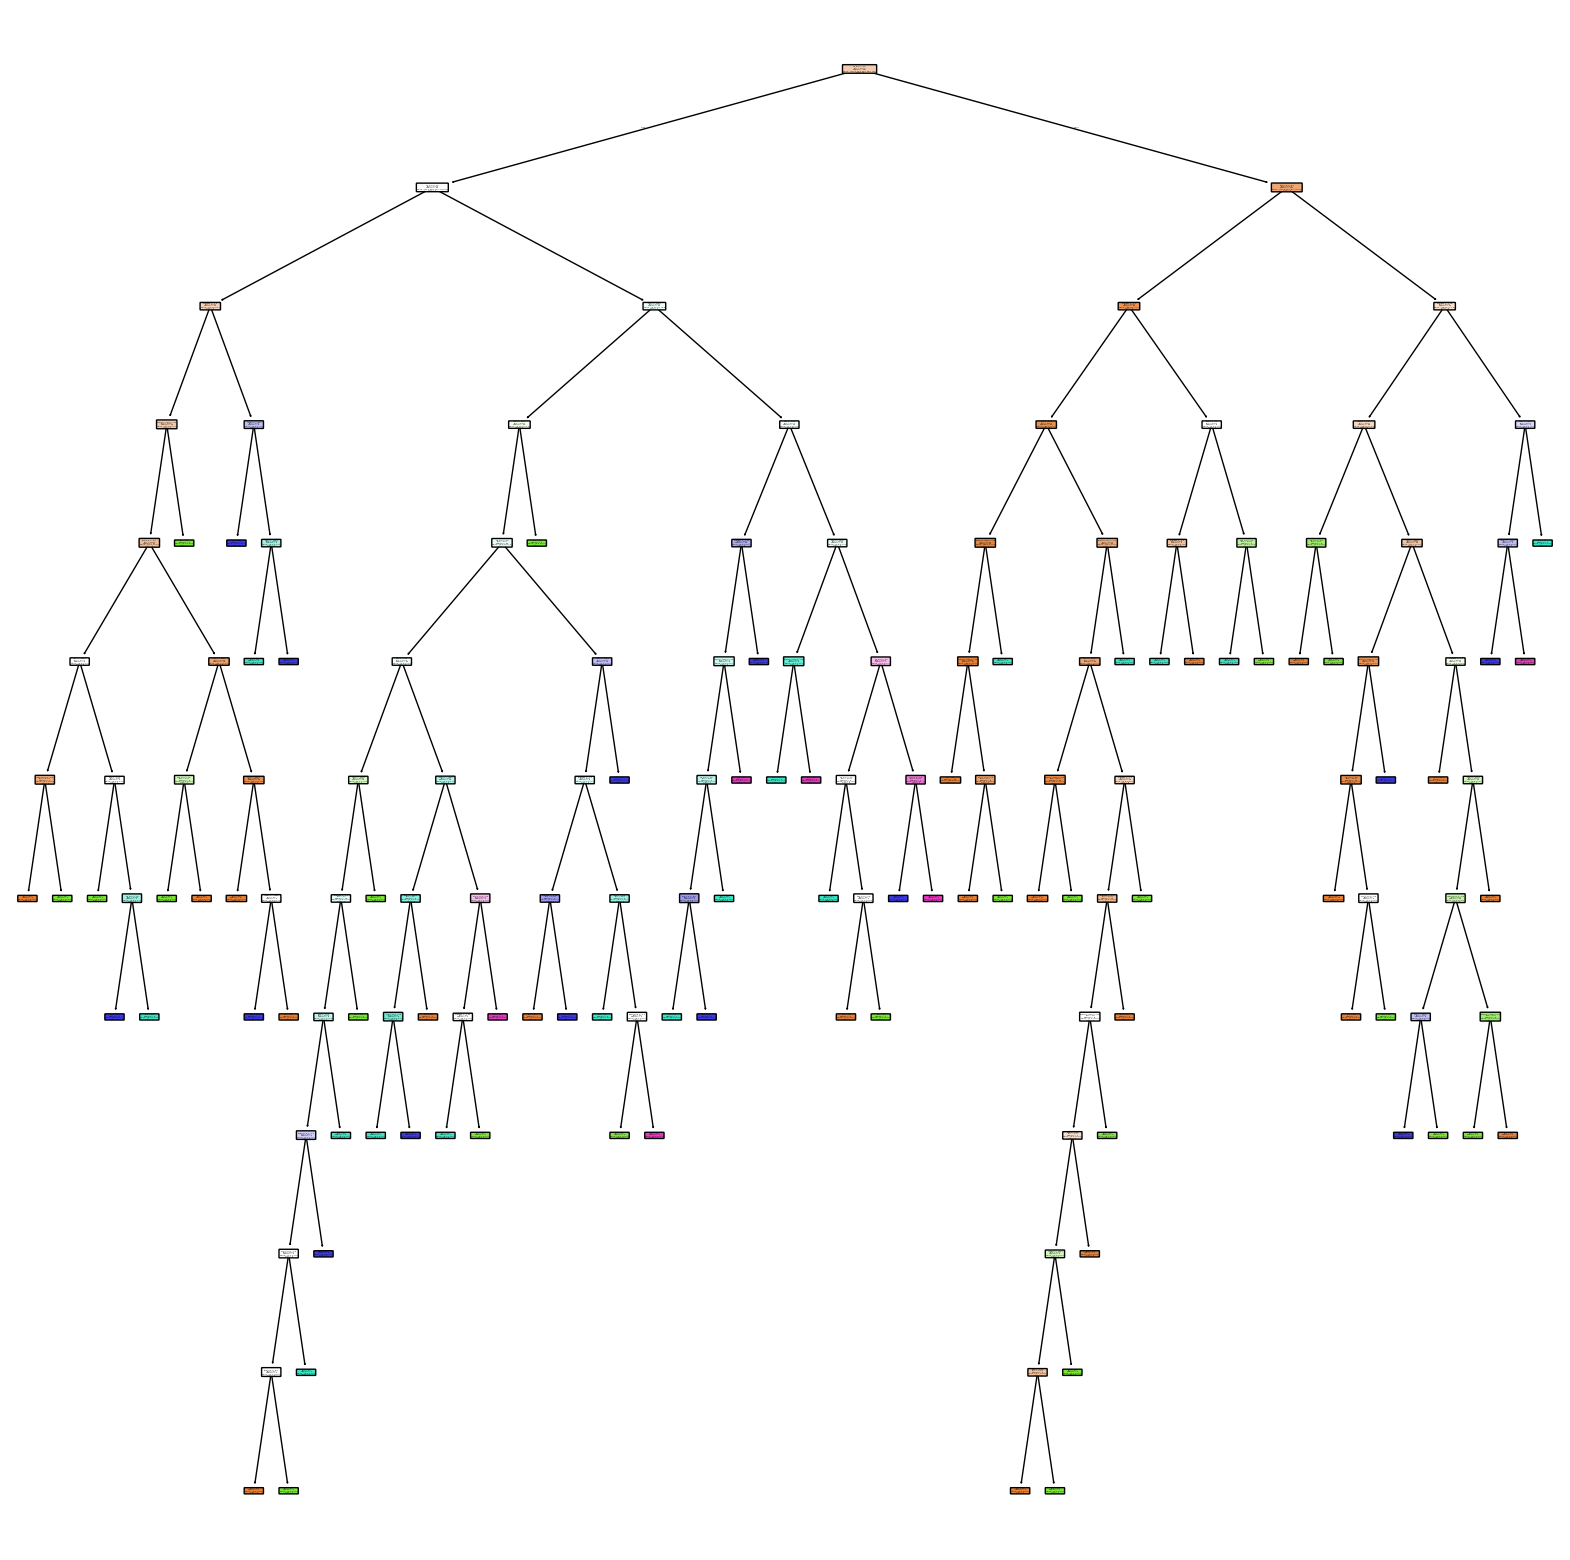

In [42]:
plt.figure(figsize=(20,20))
plot_tree(dt2, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);

#note that this tree is very unbalanced as we could tell from the data

In [43]:
pred_train2 = dt.predict(X_train2)
pred_test2 = dt.predict(X_test2)
#She messed up the notes here but the accuracy score output here is 1.0 for training data and 0.50819 for testing data

#We have a big case of overfitting here. One of the ways we can fix that is by limiting the layers.

In [44]:
#We ccan create a confusion matrix to see where the model is overfitting
#predicted values are on y axis (30, 6,0,0,0)
#wtf is this her explanation doesn't make sense

confusion_matrix(y_test2, pred_test2)

array([[30,  6,  0,  0,  0],
       [ 2,  7,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 1,  2,  0,  0,  0]])

Just skip ahead to the next marked section since she doesn't mention the next few lines of code in the lecture notes

In [45]:
accuracy_score(y_test2, pred_test2)

0.6166666666666667

In [46]:
accuracy_score(y_train2, pred_train2)

0.7130801687763713

In [47]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

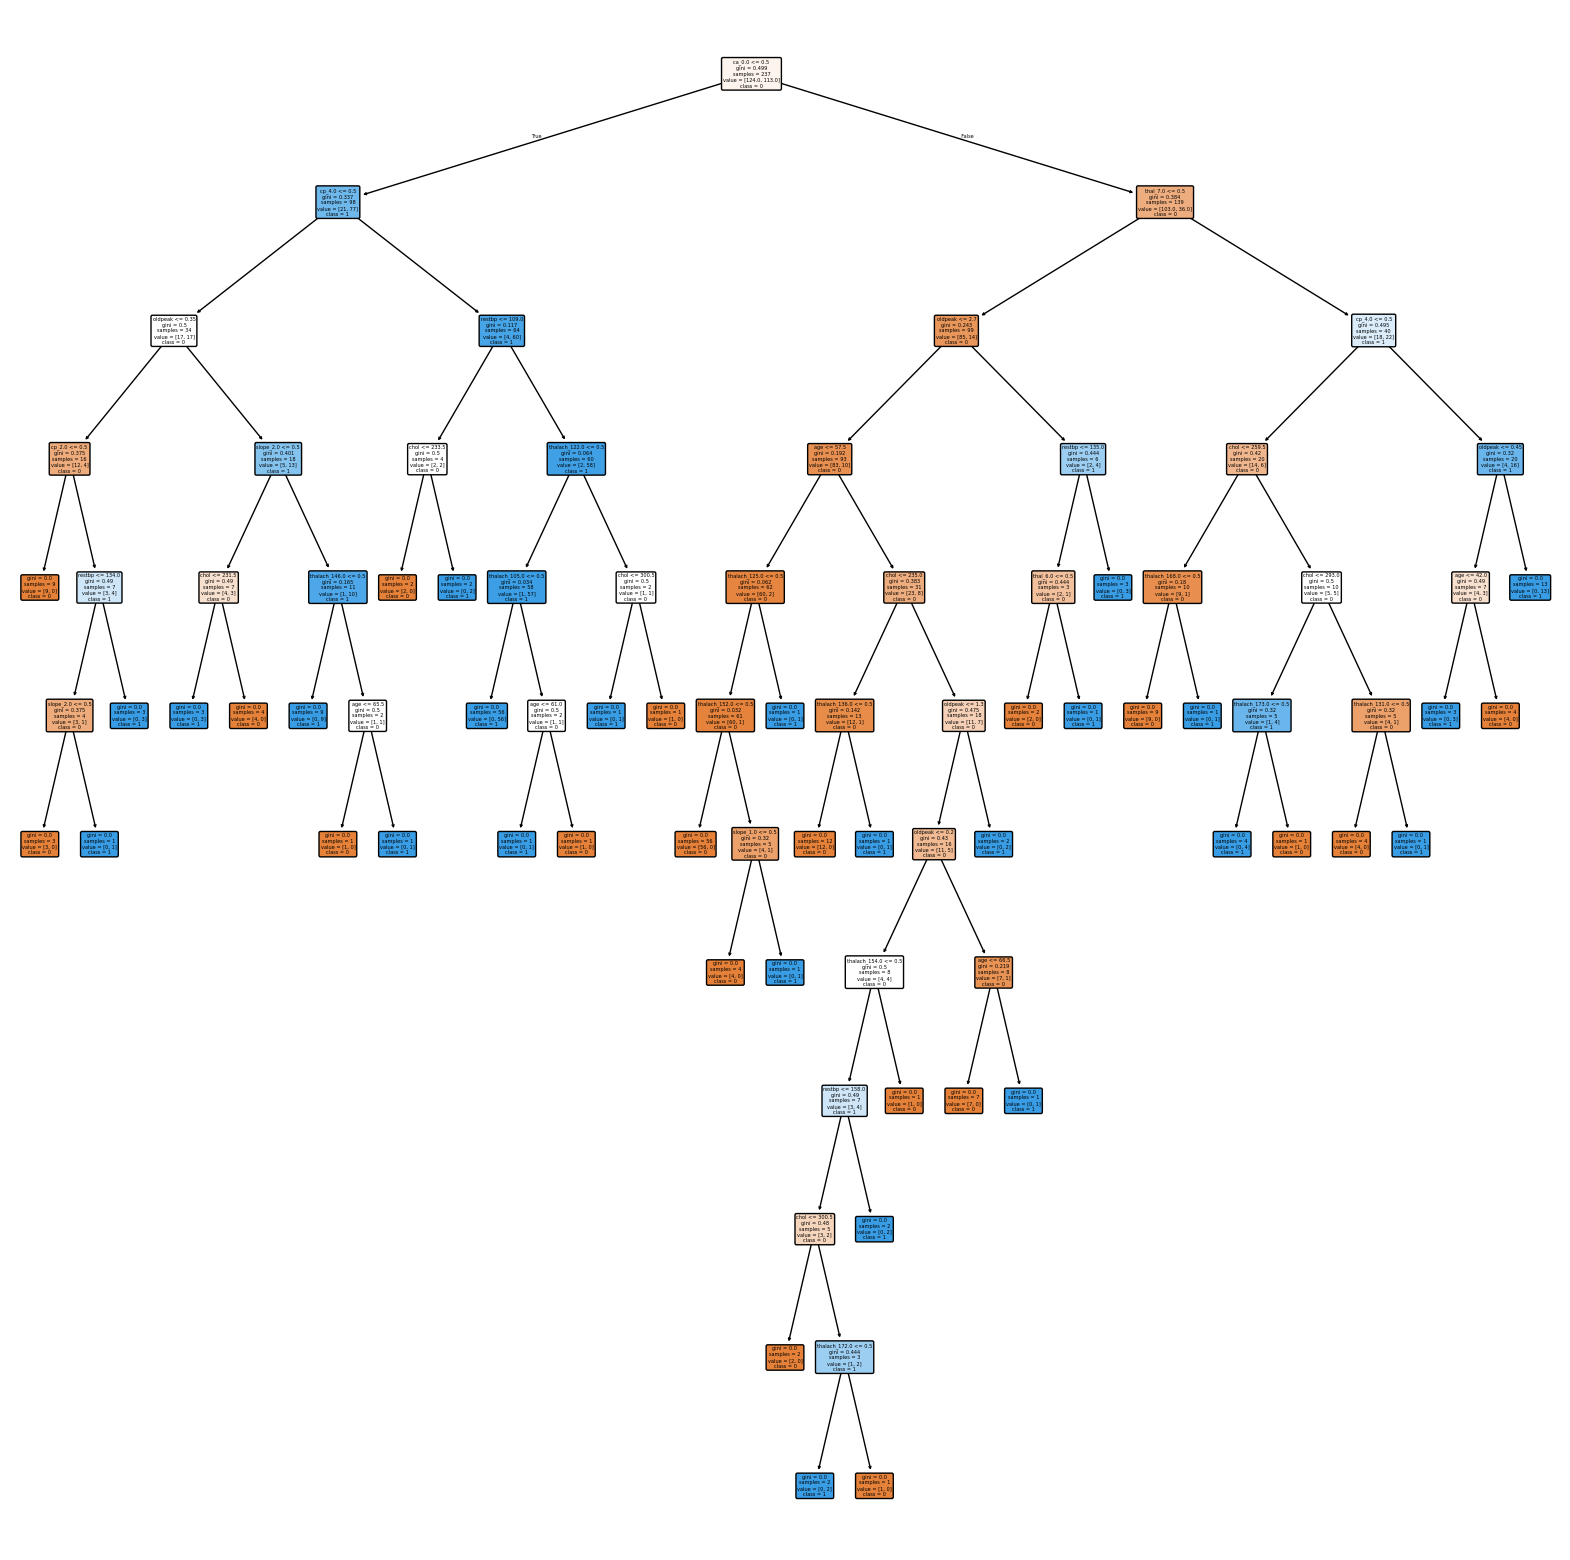

In [48]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [49]:
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)

In [50]:
# without constraints we can see the tree is perfectly fitted to the training data

#same thing I mentioned previously, this is basically just overfitted as we can see

print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

1.0
0.85


In [51]:
#To optimize our model for overfitting there are 3 main parameters we can play with
#max_depth
#min_samples_split
#min_samples_leaf

#For depth she just chose it at random. For min sample split to node she just arbitrarily chose this set too. For min samples leaf she also just chose it randomly

params = {'max_depth':[2,3,4,5,6,7,8]
          , 'min_samples_split': [8,10,15,20],
           'min_samples_leaf': [4, 8, 10, 20]}

In [52]:
#First we will look at the results for this with gridsearch and scoring with accuracy
# Verbose just means its going to explain the output to you in 1 line "fitting 5 folds for each of ..."

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dt, params, cv=5,verbose=1, scoring='accuracy')

In [53]:
grid_search.fit(X_train, y_train)
#Then we are fitting the xtrain and y train data aka the multiclass data

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [4, 8, 10, 20],
                         'min_samples_split': [8, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [54]:
print(grid_search.best_params_)
#here we pring and see the ideal paramters

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 8}


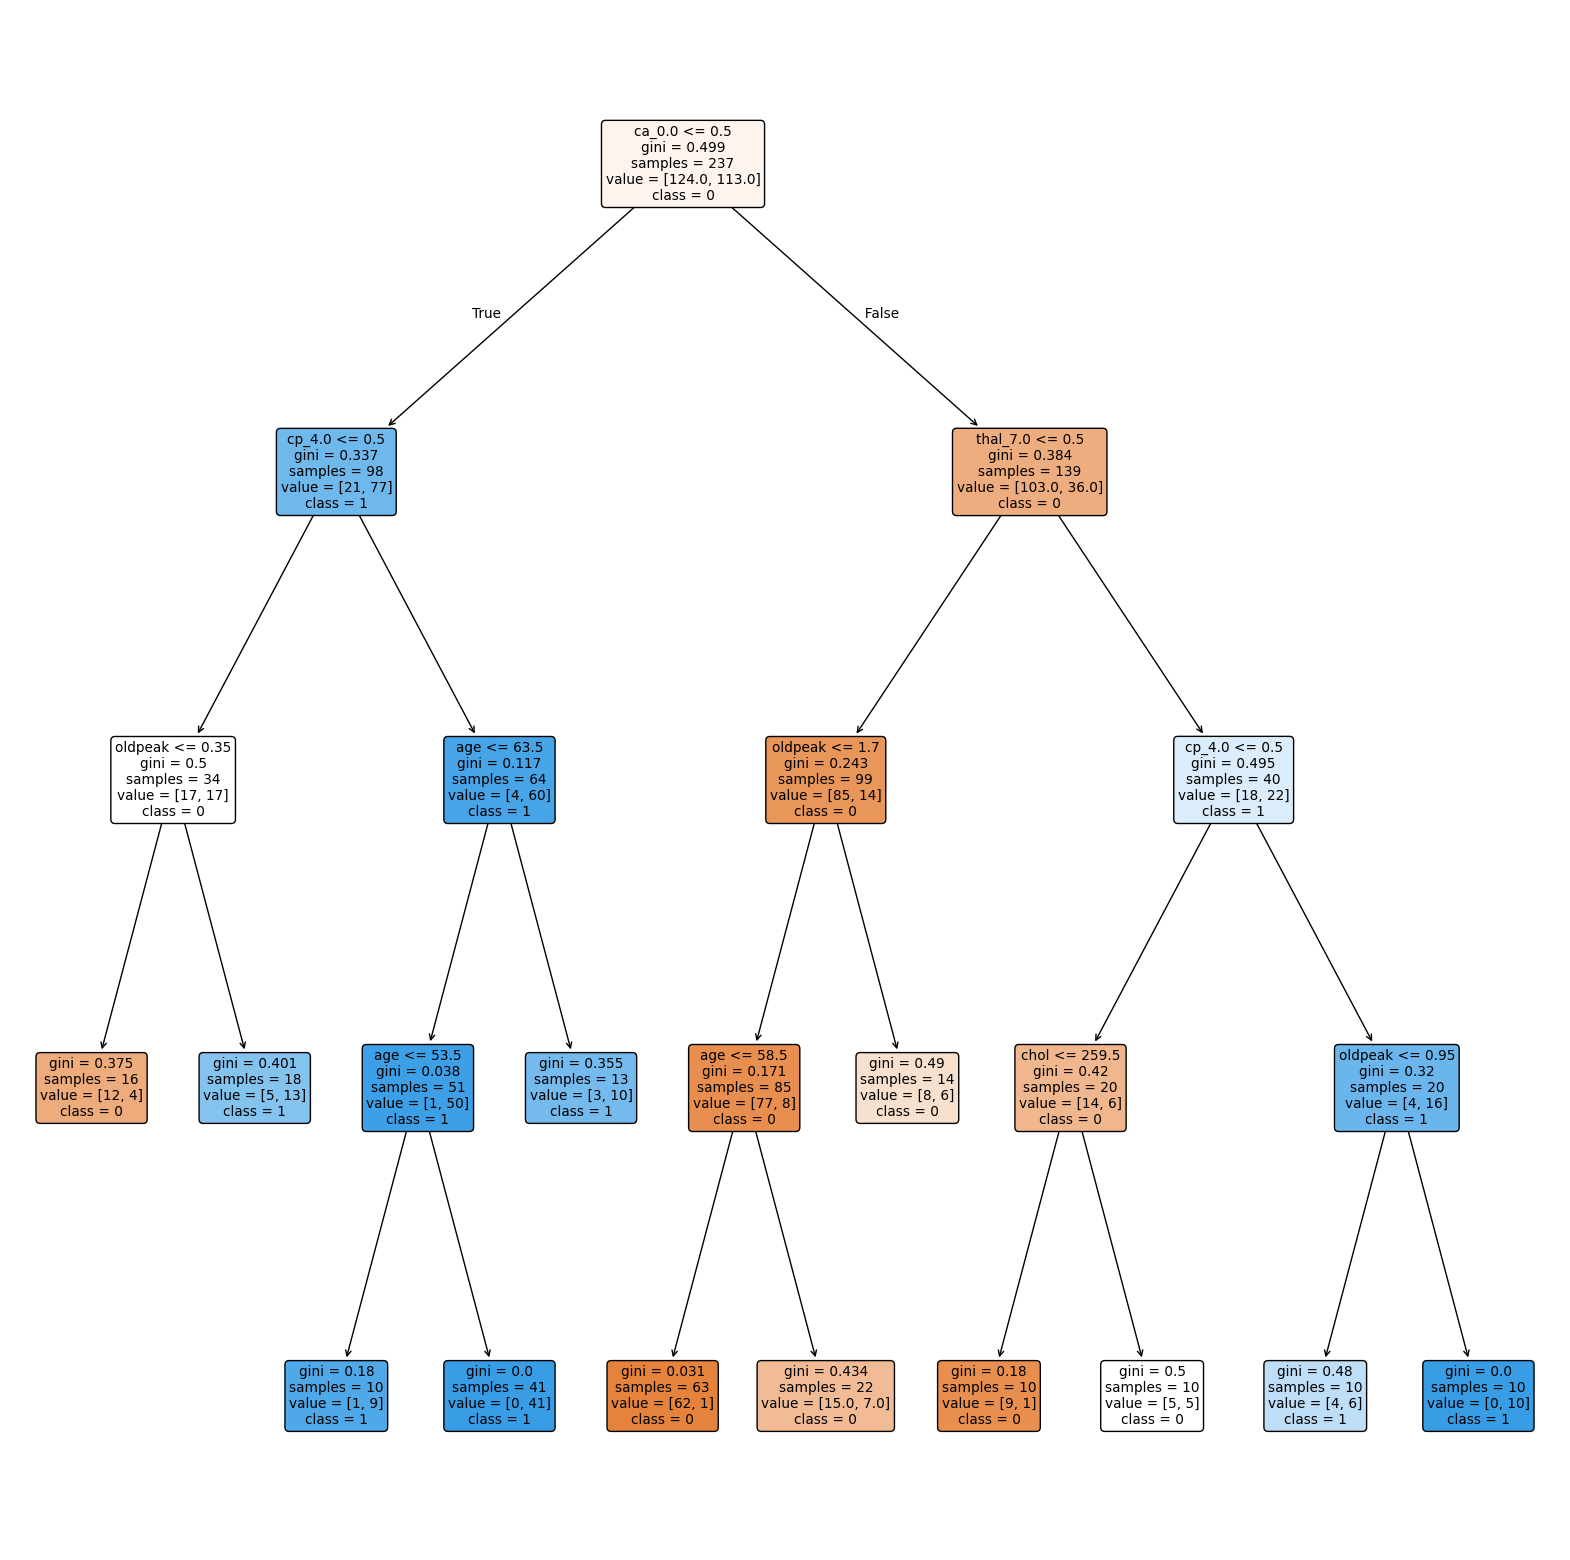

In [55]:
#making decision tree again as we can see from the figure it looks much better and is more balanced

#note that we are taking the parameters generated from the hyperparameter tuning and using them for the decision tree here

dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=10, min_samples_split=8,random_state=123)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1'], feature_names=X_encoded.columns);

In [56]:
pred_train1 = dt.predict(X_train)
pred_test1 = dt.predict(X_test)
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

#As we can see the training and testing data are both much more similar that is more balanced. 
# this indicates that its better

0.8438818565400844
0.8


Part below this is extra that she forgot to add to the codefile

In [57]:
#She didn't put the gridsearch hyperparamter tuning in the code here but the code looks like below

random_search.fit(X_train, y_train)

#Then we print the parameters

print(random_search.best_params_)


#Then basically just repeat the same steps after that from above

#Most likely for exam if we do decision trees then we would probably do gridsearch since its more accurate
#Theoretically gridsearch is better 

NameError: name 'random_search' is not defined